A. Conceptual Questions



the regression model:

$$
\hat{Y} = \beta_0 + \beta_1 \cdot GPA + \beta_2 \cdot IQ + \beta_3 \cdot Level + \beta_4 \cdot (GPA \times IQ) + \beta_5 \cdot (GPA \times Level)
$$

with the coefficients:

$$
\beta_0 = 50,\ \beta_1 = 20,\ \beta_2 = 0.07,\ \beta_3 = 35,\ \beta_4 = 0.01,\ \beta_5 = -10
$$



---

### we split into 2 eqution one for each group

For **high school graduates** ($Level = 0$):

$$
\hat{Y}_{HS} = 50 + 20 \cdot GPA + 0.07 \cdot IQ + 0.01 \cdot (GPA \cdot IQ)
$$

For **college graduates** ($Level =1$):

$$
\hat{Y}_{College} = 50 + 20 \cdot GPA + 0.07 \cdot IQ + 35 + 0.01 \cdot (GPA \cdot IQ) -10 \cdot GPA
$$


---

### we take the diffrence between the two eqution :


$$
\hat{Y}_{College} - \hat{Y}_{HS} = [50 + 20 \cdot GPA + 0.07 \cdot IQ + 35 + 0.01 \cdot (GPA \cdot IQ) -10 \cdot GPA] - [50 + 20 \cdot GPA + 0.07 \cdot IQ + 0.01 \cdot (GPA \cdot IQ)]
$$

Simplifies to:

$$
\hat{Y}_{College} - \hat{Y}_{HS} = 35 -10 \cdot GPA
$$

---

### then we find the intrsection "the point where both earn the same"



$$
35 -10 \cdot GPA =0
$$


$$
GPA =3.5
$$

---

### this mean that 3.5 is our inflation point witche mean 

* If $GPA <3.5$, the difference is positive → college graduates earn more.
* If $GPA =3.5$, the difference is zero → both groups earn the same.
* If $GPA >3.5$, the difference is negative → high school graduates earn more.

---

### we can now compare to the statments and find that only one is correct


> **(iii)** For a fixed value of IQ and GPA, high school graduates earn more, on average, than college graduates provided that the GPA is high enough.

2. Predict the salary of a college graduate with IQ of 110 and a GPA of 4.0




we plug the values into our regration equation is:

$$
\hat{Y} = \beta_0 + \beta_1 \cdot GPA + \beta_2 \cdot IQ + \beta_3 \cdot Level + \beta_4 \cdot (GPA \cdot IQ) + \beta_5 \cdot (GPA \cdot Level)
$$

$$
\hat{Y} = 50 + 20 \cdot 4.0 + 0.07 \cdot 110 + 35 \cdot 1 + 0.01 \cdot (4.0 \cdot 110) + (-10) \cdot (4.0 \cdot 1)
$$



### after pluging it in the calcultor we get

$$
\boxed{\hat{Y} = 137.1\ \text{(thousand dollars)}}
$$



True or false: Since the coefficient for the GPA/IQ interaction term is very small,
there is very little evidence of an interaction effect. Justify your answer.

practicaly its true like the the answer of the prevuse qoution the effect was very small 4.4 out of 137 

B. Practical
Overview of the steps
1. Load the data and get an overview of the data
2. Perform simple linear regressions
3. Use the simple linear regression models
4. Perform multiple linear regressions
5. Use the multiple linear regression model
Steps in detail
Load the data and get an overview of the data
Load the data file Boston.rda or Boston.csv .

### Steps in Detail

#### Load the Data and Get an Overview of the Data
- Load the data file `Boston.csv`.



In [1]:
import pandas as pd
df = pd.read_csv("dataset/Boston.csv", index_col=0)

### Display the Number of Predictors and Their Names

In [2]:
print(df.shape[1])
print(df.columns.tolist())

14
['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']


### Print a Statistical Summary of the Predictors and the Response `medv`

In [3]:
print(df.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

### Display the number of data points:

In [4]:
print(df.shape[0])

506


### Display the data in a table (subset of rows is sufficient):


In [5]:
print(df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
1  396.90   4.98  24.0  
2  396.90   9.14  21.6  
3  392.83   4.03  34.7  
4  394.63   2.94  33.4  
5  396.90   5.33  36.2  


### Plot some predictors (at least two) against the response values. We choose lstat , rm ,and age . i added crim and pupol-teacher ratio

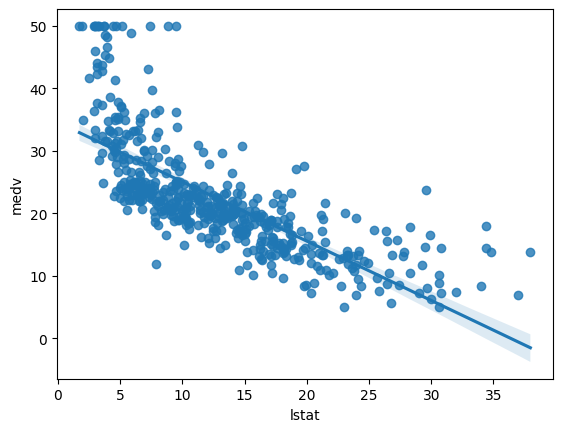

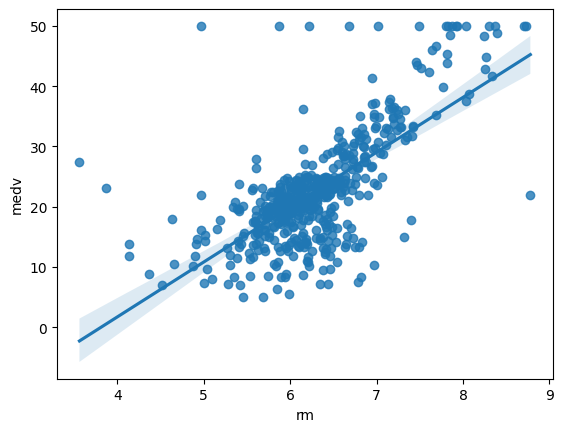

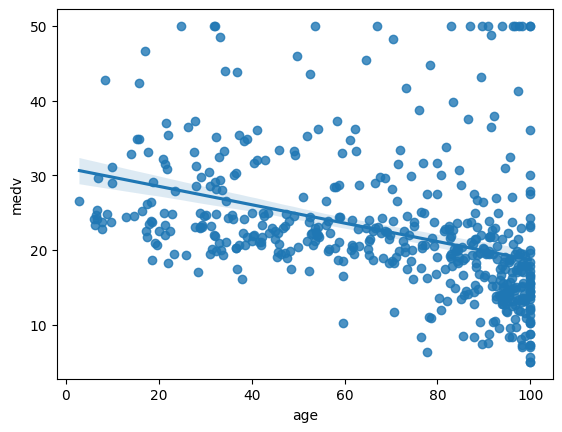

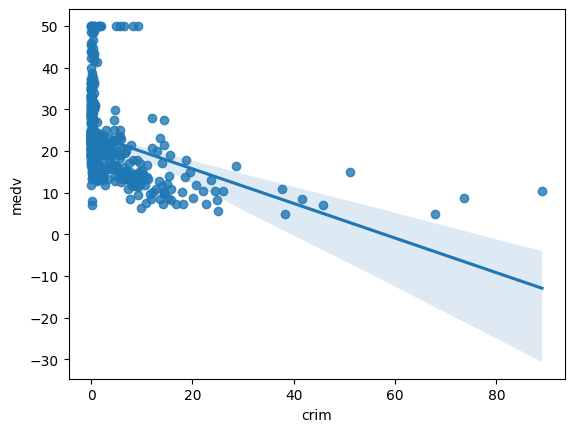

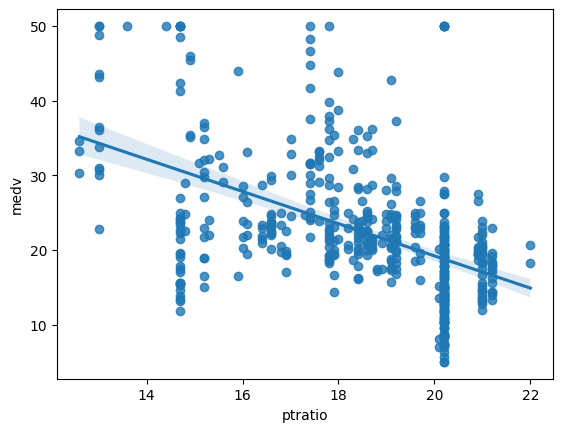

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x='lstat', y='medv', data=df)
plt.show()
sns.regplot(x='rm', y='medv', data=df)
plt.show()
sns.regplot(x='age', y='medv', data=df)
plt.show()
sns.regplot(x='crim', y='medv', data=df)
plt.show()
sns.regplot(x='ptratio', y='medv', data=df)
plt.show()

### Perform Simple Linear Regressions

Fit a simple linear regression model with `medv` as the response and some (at least two) predictors individually. We choose the following predictors:

- `lstat`
- `rm`
- `age`

i added 

- `crim`
- `ptratio`

In [7]:
import statsmodels.api as sm
print("this stats for lstat")
X = sm.add_constant(df['lstat'])
model_lstat = sm.OLS(df['medv'], X).fit()
print(model_lstat.summary())



this stats for lstat
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 10 May 2025   Prob (F-statistic):           5.08e-88
Time:                        18:57:14   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.56

In [8]:
print("this stats for rm")
X = sm.add_constant(df['rm'])
model_rm = sm.OLS(df['medv'], X).fit()
print(model_rm.summary())


this stats for rm
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sat, 10 May 2025   Prob (F-statistic):           2.49e-74
Time:                        18:57:14   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650  

In [9]:
print("this stats for age")
X = sm.add_constant(df['age'])
model_age = sm.OLS(df['medv'], X).fit()
print(model_age.summary())


this stats for age
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Sat, 10 May 2025   Prob (F-statistic):           1.57e-18
Time:                        18:57:14   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9787      0.999 

In [10]:
print("this stats for crim")
X = sm.add_constant(df['crim'])
model_crim = sm.OLS(df['medv'], X).fit()
print(model_crim.summary())


this stats for crim
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sat, 10 May 2025   Prob (F-statistic):           1.17e-19
Time:                        18:57:14   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409

In [11]:
print("this stats for ptratio")
X = sm.add_constant(df['ptratio'])
model_ptratio = sm.OLS(df['medv'], X).fit()
print(model_ptratio.summary())

this stats for ptratio
                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sat, 10 May 2025   Prob (F-statistic):           1.61e-34
Time:                        18:57:14   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.3446      3.

### Percent of low socioeconomic status households (`lstat`) vs house price

From the summary stats, `lstat` ranges from ~1.7 to ~38, showing a wide spread and likely right-skewed distribution.

When we plot it, we see a clear **negative relationship** — as `lstat` increases, `medv` decreases. This makes sense: poorer neighborhoods tend to have lower house prices, and the data strongly support that.

From the regression, each +1% in low-status households is linked to about a **$950 drop** in median price. It’s the strongest predictor so far, explaining **54% of the variation** in prices.

In simple terms, wealthier neighborhoods have much higher home values — which is exactly what we’d expect.

---

### Average number of rooms per house (`rm`) vs house price

Summary stats show `rm` ranges from ~3.6 to ~8.8 rooms, with a fairly balanced spread.

On the plot, we see a **strong positive relationship** — more rooms per house clearly lead to higher prices. Again, this feels intuitive: larger homes tend to be more expensive.

The regression tells us each additional room adds about **$9,100** to the median price. It explains **48% of the variation**, making it one of the top predictors.

Simply put, bigger houses are worth more — no surprise, but it’s great to see the numbers back it up.

---

### Age of houses (`age`) vs house price

The age variable ranges from ~2.9% to 100% old units, with a right-skewed pattern (lots of old houses).

The plot shows a **negative relationship**, though weaker than `lstat` or `rm`. As houses get older, prices tend to go down slightly. This makes sense: newer homes or neighborhoods often attract higher prices because of better condition or updated amenities.

The regression shows each +1% increase in old units lowers price by about **$120**. But it only explains **14% of the variation** — so it’s a weaker predictor.

In short, older neighborhoods slightly reduce house values, but they’re not the main price driver.

---

### Crime rate per capita (`crim`) vs house price

Summary stats show `crim` ranges from ~0.006 to ~89 — a huge range with major right skew and clear outliers.

The plot shows a **negative but noisy relationship** — higher crime is linked to lower prices, but the scatter is messy. This aligns with intuition: people prefer safer neighborhoods, but the relationship here isn’t as tight as we might expect.

Regression tells us each unit increase in crime rate reduces median price by about **$420**, but it explains only **15% of the variation**.

In simple terms, higher crime weakly lowers house prices, but it’s not a main factor compared to wealth or house size.

---

### Pupil-teacher ratio (`ptratio`) vs house price

`ptratio` ranges from ~12.6 to ~22, with moderate spread.

The plot reveals a **negative relationship** — as class sizes get bigger (more students per teacher), home prices drop. This makes sense because good schools are a key selling point for families, and overcrowded schools can signal lower community investment.

The regression shows each additional student per teacher cuts median price by about **$2,160**, explaining **26% of the variation**.

In short, school quality matters — neighborhoods with better student-teacher ratios tend to have more expensive homes.

---

### ✅ Notes

- All predictors have **p < 0.001 → statistically significant**.
- **lstat** and **rm** are the top predictors (highest R²).
- **crim, age, ptratio** have much smaller explanatory power (low R²).


### Obtain a confidence interval for the coefficient estimates for the individual models.


In [12]:
print("this is confidence interval for lstat")
print(model_lstat.conf_int())
print("this is confidence interval for rm")
print(model_rm.conf_int())
print("this is confidence interval for age")
print(model_age.conf_int())
print("this is confidence interval for crim")
print(model_crim.conf_int())
print("this is confidence interval for ptratio")
print(model_ptratio.conf_int())

this is confidence interval for lstat
               0          1
const  33.448457  35.659225
lstat  -1.026148  -0.873951
this is confidence interval for rm
               0          1
const -39.876641 -29.464601
rm      8.278855   9.925363
this is confidence interval for age
               0          1
const  29.015752  32.941604
age    -0.149647  -0.096679
this is confidence interval for crim
               0         1
const  23.229272  24.83694
crim   -0.501421  -0.32896
this is confidence interval for ptratio
                 0          1
const    56.393267  68.295988
ptratio  -2.477454  -1.836897


### 📊 Interpretation of confidence intervals

---

**Percent of low socioeconomic status households (`lstat`)**

From the confidence interval, the intercept is between 33.45 and 35.66,  
and the slope for `lstat` is between **−1.03 and −0.87**.

What this tells us:  
We’re 95% confident that for each +1% increase in low-status households, median price goes down by between **$870 and $1,030**.  
The interval is fully negative → this is a strong, consistently negative effect.

---

**Average number of rooms (`rm`)**

The intercept ranges between −39.88 and −29.46,  
and the slope for `rm` is between **8.28 and 9.93**.

What this tells us:  
We’re 95% confident that each extra room adds **$8,280 to $9,930** to the median price.  
The interval is fully positive → this is a strong and reliably positive effect.

---

**Age of houses (`age`)**

The intercept ranges between 29.02 and 32.94,  
and the slope for `age` is between **−0.15 and −0.10**.

What this tells us:  
We’re 95% confident that every +1% in old units reduces median price by between **$100 and $150**.  
The effect is consistently negative, though smaller compared to the top predictors.

---

**Crime rate per capita (`crim`)**

The intercept is between 23.23 and 24.84,  
and the slope for `crim` is between **−0.50 and −0.33**.

What this tells us:  
We’re 95% confident that each unit increase in crime rate lowers the median price by between **$330 and $500**.  
The relationship is moderately negative and quite consistent.

---

**Pupil-teacher ratio (`ptratio`)**

The intercept is between 56.39 and 68.30,  
and the slope for `ptratio` is between **−2.48 and −1.84**.

What this tells us:  
We’re 95% confident that each extra student per teacher reduces median price by between **$1,840 and $2,480**.  
The effect is clearly negative and meaningful.

---

### ✅ Summary notes

- All predictors have **tight, narrow confidence intervals** → we’re pretty confident in the estimates.
- None of the intervals cross zero → all effects are statistically significant.
- The direction of the effects matches our earlier findings:
    - `lstat`, `age`, `crim`, `ptratio` → negative effect on price  
    - `rm` → positive effect on price


### Use the Simple Linear Regression Models

Predict the `medv` response values for some selected predictor values. Calculate the prediction intervals for these values.

In [13]:
new_lstat = sm.add_constant(pd.DataFrame({'lstat':[5,10,15]}))
print(model_lstat.get_prediction(new_lstat).summary_frame(alpha=0.05))

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  29.803594  0.405247      29.007412      30.599776     17.565675   
1  25.053347  0.294814      24.474132      25.632563     12.827626   
2  20.303101  0.290893      19.731588      20.874613      8.077742   

   obs_ci_upper  
0     42.041513  
1     37.279068  
2     32.528459  


In [14]:
new_rm = sm.add_constant(pd.DataFrame({'rm':[5,6.5,8]}))
print(model_rm.get_prediction(new_rm).summary_frame(alpha=0.05))

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  10.839924  0.613410       9.634769      12.045079     -2.214474   
1  24.493088  0.307657      23.888639      25.097536     11.480391   
2  38.146251  0.776633      36.620414      39.672088     25.058353   

   obs_ci_upper  
0     23.894322  
1     37.505784  
2     51.234149  


In [15]:
new_age = sm.add_constant(pd.DataFrame({'age':[25,50,75]}))
print(model_age.get_prediction(new_age).summary_frame(alpha=0.05))

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  27.899610  0.699094      26.526112      29.273107     11.090368   
1  24.820542  0.454307      23.927973      25.713110      8.043748   
2  21.741474  0.388844      20.977518      22.505429      4.971031   

   obs_ci_upper  
0     44.708852  
1     41.597335  
2     38.511917  


In [16]:
new_crim = sm.add_constant(pd.DataFrame({'crim':[0.1,1,5]}))
print(model_crim.get_prediction(new_crim).summary_frame(alpha=0.05))

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  23.991587  0.407461      23.191056      24.792118      7.304363   
1  23.617916  0.394210      22.843418      24.392413      6.931921   
2  21.957155  0.382030      21.206588      22.707721      5.272253   

   obs_ci_upper  
0     40.678811  
1     40.303911  
2     38.642056  


In [17]:
new_ptratio = sm.add_constant(pd.DataFrame({'ptratio':[15,18,21]}))
print(model_ptratio.get_prediction(new_ptratio).summary_frame(alpha=0.05))

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  29.986998  0.664554      28.681360      31.292636     14.350492   
1  23.515472  0.360312      22.807574      24.223370      7.917500   
2  17.043946  0.544393      15.974387      18.113505      1.425381   

   obs_ci_upper  
0     45.623504  
1     39.113444  
2     32.662511  


For the two variables I added, `crim` and `ptratio`, I chose the intervals after looking at the summary statistics at the beginning of the experiment; what I ended up with is `crim = [0.1, 1, 5]` and `ptratio = [15, 18, 21]` because these cover low, medium, and high values without going into extreme outliers, giving a realistic and interpretable range.


### 📊 Interpretation of predicted house prices and intervals

---

**`lstat` (low socioeconomic households)**  
- 5% → $29.8k (range $17.6k–$42.0k)  
- 10% → $25.1k (range $12.8k–$37.3k)  
- 15% → $20.3k (range $8.1k–$32.5k)  

As `lstat` increases, prices drop steadily. Poorer neighborhoods have lower home values. The prediction intervals shrink slightly as `lstat` rises, suggesting a bit less uncertainty in low-price areas.

---

**`rm` (number of rooms)**  
- 5 rooms → $10.8k (−$2.2k–$23.9k)  
- 6.5 rooms → $24.5k ($11.5k–$37.5k)  
- 8 rooms → $38.1k ($25.1k–$51.2k)  

More rooms strongly increase price. The intervals widen as room count increases, showing more price variability among large homes.

---

**`age` (percent old houses)**  
- 25% → $27.9k ($11.1k–$44.7k)  
- 50% → $24.8k ($8.0k–$41.6k)  
- 75% → $21.7k ($5.0k–$38.5k)  

Older areas show a slight price drop, but intervals stay fairly wide across all levels. This suggests mixed price outcomes no matter the age.

---

**`crim` (crime rate)**  
- 0.1 → $24.0k ($7.3k–$40.7k)  
- 1 → $23.6k ($6.9k–$40.3k)  
- 5 → $22.0k ($5.3k–$38.6k)  

Higher crime slightly lowers price, but the intervals stay wide, meaning the effect of crime on price can vary a lot between neighborhoods.

---

**`ptratio` (pupil-teacher ratio)**  
- 15 → $30.0k ($14.4k–$45.6k)  
- 18 → $23.5k ($7.9k–$39.1k)  
- 21 → $17.0k ($1.4k–$32.7k)  

Better schools (lower ratios) raise prices. The intervals widen as the ratio increases, reflecting more price uncertainty in areas with crowded schools.

---



### Perform Multiple Linear Regressions

Fit `medv` as the response with the previously selected predictors (`lstat`, `rm`, `age`, `crim`, `ptratio`) altogether.

In [18]:
X = sm.add_constant(df[['lstat','rm','age','crim','ptratio']])
model_5 = sm.OLS(df['medv'], X).fit()
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     215.9
Date:                Sat, 10 May 2025   Prob (F-statistic):          2.24e-122
Time:                        18:57:14   Log-Likelihood:                -1549.2
No. Observations:                 506   AIC:                             3110.
Df Residuals:                     500   BIC:                             3136.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.5695      3.985      4.409      0.0

### 📊 Interpretation of multiple linear regression (`lstat`, `rm`, `age`, `crim`, `ptratio`)

The model explains about **68%** of the variation in housing prices (`R² = 0.683`), which is a big improvement over the single-variable models.

---

**Intercept (`const`)** → $17.6k  
This is the baseline price when all predictors are zero — mostly theoretical but useful for the model.

---

**`lstat` (low socioeconomic households)** → coef −0.58  
As `lstat` increases by 1%, price drops about **$580**. The negative effect stays strong even after controlling for other predictors.

---

**`rm` (number of rooms)** → coef +4.46  
Each extra room adds about **$4,460** to the price. Still a strong positive effect, though smaller than in the simple model.

---

**`age` (percent old houses)** → coef +0.018  
This turns slightly positive but is **not significant** (`p = 0.082`). Age no longer matters much once we control for other factors.

---

**`crim` (crime rate)** → coef −0.07  
Each unit increase in crime lowers price by about **$70**. The effect is small but statistically significant (`p = 0.024`).

---

**`ptratio` (pupil-teacher ratio)** → coef −0.90  
Each extra student per teacher reduces price by about **$900**. The negative impact of crowded schools remains strong.

---


- The model improves overall fit `age` lost its importance when combined with others.  

### Fit medv as response with all available predictors altogether.

In [19]:
X = sm.add_constant(df.drop(columns='medv'))
model_full = sm.OLS(df['medv'], X).fit()
print(model_full.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 10 May 2025   Prob (F-statistic):          6.72e-135
Time:                        18:57:15   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

### 📊 Interpretation of full model with all predictors

This full model explains about **74%** of the variation in house prices (`R² = 0.741`), which is the best fit so far.

---

**Intercept (`const`)** → $36.5k  
Baseline price when all predictors are zero — mostly theoretical.

---

**Key predictors and what they tell us:**

- **`crim`** → −0.11 → Each unit increase in crime lowers price by ~$110. Still a small but meaningful negative effect.
- **`zn`** → +0.046 → Higher residential zoning slightly raises prices (~$46 per unit), small but significant.
- **`indus`** → not significant (`p = 0.738`) → industrial share has no clear price effect here.
- **`chas`** → +2.69 → Homes near the Charles River are ~$2,690 higher on average.
- **`nox`** → −17.77 → Higher air pollution sharply lowers prices (~$17.8k per unit).
- **`rm`** → +3.81 → Each extra room adds ~$3,810, a strong positive effect.
- **`age`** → not significant (`p = 0.958`) → age loses influence in the full model.
- **`dis`** → −1.48 → Longer distance to employment centers cuts ~$1,480 from price.
- **`rad`** → +0.31 → Better highway access slightly raises prices.
- **`tax`** → −0.012 → Higher taxes reduce price slightly (~$12 per unit).
- **`ptratio`** → −0.95 → More crowded schools lower price by ~$950 per extra student per teacher.
- **`black`** → +0.009 → Higher Black population index slightly raises prices (~$9 per unit), though the meaning is complex.
- **`lstat`** → −0.52 → Higher % low-status households still strongly reduces price (~$520 per unit).

---

Notes:
- Almost all predictors are significant (`p < 0.05`), except `indus` and `age`.
- The **condition number is very high (~15,100)** → which tells us some predictors are tangled together, making it harder to trust the exact size of each effect.


### Check the correlation between the predictors

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
black   -0.385064  0.175520 

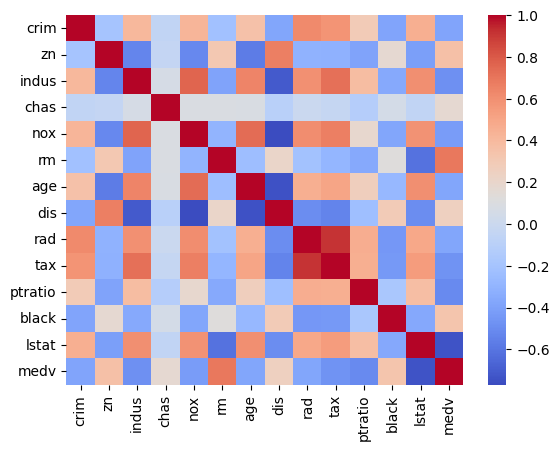

In [20]:
corr = df.corr()
print(corr)

# heat-map
import seaborn as sns, matplotlib.pyplot as plt
sns.heatmap(corr, cmap='coolwarm')
plt.show()

### 📊 Interpretation of the correlation matrix

Looking at the correlation matrix and heatmap, we can see how strongly the predictors are related to each other and to the response `medv`.

---

**Strong correlations with house price (`medv`):**
- `lstat` → −0.74 → strong negative → more low-status households = lower price.
- `rm` → +0.70 → strong positive → more rooms = higher price.
- `ptratio` → −0.51 → moderately negative → larger class sizes = lower price.
- `indus`, `nox`, `crim` → moderate negative → more industry, pollution, or crime = lower price.
- `black`, `zn` → weak positive.

---

**Strong correlations between predictors (possible multicollinearity):**
- `rad` and `tax` → +0.91 → more highway access = higher taxes.
- `nox` and `indus` → +0.76 → more industry = more pollution.
- `dis` and `nox` → −0.77 → greater distance from jobs = less pollution.
- `age` and `dis` → −0.75 → older areas are closer to city centers.

---

✅ What this tells us:
- Some predictors are tightly linked (like `rad` and `tax`), so in regression models we need to **watch out for multicollinearity**.
- The strongest price drivers (`lstat` and `rm`) stand out clearly.
- Pollution, industry, crime, and school quality all matter, but they’re also tangled with each other.



### Use the multiple linear regression model

In [21]:
import itertools

# Define the values
lstatC = [5, 10, 15]
rmC = [5, 6.5, 8]

# Create all combinations (expand.grid equivalent)
selected_predictor_values = pd.DataFrame(list(itertools.product(lstatC, rmC)), columns=['lstat', 'rm'])

# Show the grid
print(selected_predictor_values)


   lstat   rm
0      5  5.0
1      5  6.5
2      5  8.0
3     10  5.0
4     10  6.5
5     10  8.0
6     15  5.0
7     15  6.5
8     15  8.0


In [22]:
import statsmodels.api as sm

# Fit the model on lstat + rm
X = sm.add_constant(df[['lstat', 'rm']])
model = sm.OLS(df['medv'], X).fit()

# Add constant to prediction grid
grid_with_const = sm.add_constant(selected_predictor_values)

# Predict with intervals
predictions = model.get_prediction(grid_with_const)
print(predictions.summary_frame(alpha=0.05))

        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  20.903875  0.856315      19.221481      22.586269      9.889729   
1  28.546057  0.377499      27.804387      29.287727     17.635923   
2  36.188239  0.663860      34.883959      37.492519     25.225479   
3  17.692084  0.693873      16.328837      19.055330      6.722152   
4  25.334266  0.263915      24.815754      25.852777     14.437027   
5  32.976448  0.739470      31.523618      34.429277     21.995024   
6  14.480292  0.570322      13.359785      15.600799      3.537875   
7  22.122474  0.304004      21.525200      22.719748     11.221204   
8  29.764656  0.865184      28.064837      31.464475     18.747835   

   obs_ci_upper  
0     31.918021  
1     39.456192  
2     47.150999  
3     28.662016  
4     36.231505  
5     43.957872  
6     25.422709  
7     33.023745  
8     40.781477  


### 📊 Interpretation of predictions for `lstat` and `rm`

We predicted median house prices (`medv`) for combinations of `lstat` (% low-status households) and `rm` (average number of rooms), along with 95% prediction intervals.

---

**Summary of patterns:**

- **Low `lstat`, high `rm` → highest prices:**  
  Example: lstat = 5, rm = 8 → predicted ~$36.2k, range ~$25.2k–$47.2k.

- **High `lstat`, low `rm` → lowest prices:**  
  Example: lstat = 15, rm = 5 → predicted ~$14.5k, range ~$3.5k–$25.4k.

- **Effect of `lstat` at fixed `rm`:**  
  Prices drop as `lstat` increases.  
  Example at rm = 6.5 →  
  lstat = 5 → ~$28.5k,  
  lstat = 10 → ~$25.3k,  
  lstat = 15 → ~$22.1k.

- **Effect of `rm` at fixed `lstat`:**  
  Prices rise as rooms increase.  
  Example at lstat = 10 →  
  rm = 5 → ~$17.7k,  
  rm = 6.5 → ~$25.3k,  
  rm = 8 → ~$33.0k.

---

**About the prediction intervals:**
- Across all combinations, the prediction intervals are fairly similar in width (~$22k).
- This means the model’s uncertainty stays consistent whether predicting low-end or high-end prices.

---

in simple terms:  
Low-status, small homes → lowest predicted prices.  
Low-status, large homes → middle range.  
High-status, large homes → highest prices.  
Prediction intervals help us see the expected spread in prices for similar homes.


# Check again the accuracy of the linear regression.

In [23]:
import statsmodels.api as sm

# Select predictors
X_ext = sm.add_constant(df[['lstat', 'rm', 'nox', 'dis', 'ptratio']])
model_ext = sm.OLS(df['medv'], X_ext).fit()

# Show summary
print(model_ext.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     242.6
Date:                Sat, 10 May 2025   Prob (F-statistic):          3.67e-131
Time:                        19:02:40   Log-Likelihood:                -1528.7
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     500   BIC:                             3095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         37.4992      4.613      8.129      0.0

# Add interaction terms
## Fit a model with interaction terms. Don't forget to also include the include the plain predictors

In [24]:
import statsmodels.formula.api as smf

# Fit model with interaction term
model_int = smf.ols('medv ~ lstat * rm + nox + dis + ptratio', data=df).fit()

# Show summary
print(model_int.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     290.8
Date:                Sat, 10 May 2025   Prob (F-statistic):          2.48e-159
Time:                        19:05:47   Log-Likelihood:                -1459.9
No. Observations:                 506   AIC:                             2934.
Df Residuals:                     499   BIC:                             2963.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1518      4.880      0.646      0.5

##  Interpretation of the two models

---

**`model_ext`**

This model includes the predictors:
- `lstat`, `rm`, `nox`, `dis`, `ptratio`

**looking at the output we can say:**
- `R² = 0.708` → explains ~71% of the variation in housing prices.
- All predictors are highly significant (`p < 0.001`).
- The effects:
    - `lstat` → strong negative effect → as low-status % increases, price drops.
    - `rm` → strong positive effect → more rooms, higher price.
    - `nox` → large negative effect → more pollution lowers price.
    - `dis` → negative effect → farther from jobs reduces price.
    - `ptratio` → negative effect → higher class sizes lower price.
- Residual standard error: ~4.99 → average price prediction error is ~$5k.

**Interpretation**  
This is a solid model that captures major independent effects but assumes all predictors act separately.

---

**`model_int`**

This model includes:
- All the above predictors **plus** the interaction term `lstat:rm`.

**Key points from the output:**
- `R² = 0.778` → explains ~77.8% of the price variation → much better fit.
- The `lstat:rm` interaction term is highly significant and negative.
- The main effects change:
    - `lstat` main effect → flips positive, because the interaction now absorbs the negative slope.
    - `rm` → becomes even stronger positive.
    - `nox`, `dis`, `ptratio` → still significant, negative effects.
- Residual standard error: ~4.36 → average prediction error drops to ~$4.4k.

**Interpretation**  
- The impact of low-status households on price **depends on house size**.  
Specifically, in bigger houses (`rm` high), the negative effect of `lstat` is stronger.
- The interaction improves model fit and gives a more realistic picture of the housing market.




# Apply non-linear transformations to some predictors

## Fit a model with non-linear transformations of the predictor terms. Don't forget to also include the include the plain predictors.

In [25]:
import statsmodels.formula.api as smf

# Fit model with non-linear (squared) interaction term
model_nl = smf.ols('medv ~ lstat * rm + I((lstat * rm)**2) + nox + dis + ptratio', data=df).fit()

# Show summary
print(model_nl.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     253.9
Date:                Sat, 10 May 2025   Prob (F-statistic):          8.05e-160
Time:                        19:15:29   Log-Likelihood:                -1455.8
No. Observations:                 506   AIC:                             2928.
Df Residuals:                     498   BIC:                             2961.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               10.5522 

## The increase of R^2 and the low -value associated with the quadratic term suggests that it
leads to an improved model. Use ANOVA to check if the quadratic fit is superior to the linear
fit.


In [26]:
import statsmodels.api as sm

# Perform ANOVA comparison between models
anova_results = sm.stats.anova_lm(model_int, model_nl)
print(anova_results)


   df_resid          ssr  df_diff     ss_diff         F    Pr(>F)
0     499.0  9500.381881      0.0         NaN       NaN       NaN
1     498.0  9348.435955      1.0  151.945925  8.094303  0.004623



**Model results**

- The quadratic model achieved **R² = 0.781**, slightly better than the linear interaction model (`R² = 0.778`).
- The squared interaction term (`I((lstat * rm)^2)`) was significant (`p ≈ 0.005`), suggesting it adds meaningful explanatory power.
- All other predictors (`lstat`, `rm`, `lstat:rm`, `nox`, `dis`, `ptratio`) remained significant.

---

**ANOVA comparison**

The ANOVA results showed:
- **F = 8.09**, **p ≈ 0.0046**
- This p-value is below 0.01 which mean that the improvment of the new model is statistcally signifigent.


## Check if including additional polynomial terms, up to N order, lead to an improvement in the model fit.

In [32]:
import statsmodels.api as sm
import numpy as np

# Generate polynomial features manually using np.power
poly_terms = ['np.power(lstat, {})'.format(i) for i in range(1, 6)]

# Create the formula string
formula = 'medv ~ ' + ' + '.join(poly_terms + ['rm', 'nox', 'dis', 'ptratio'])

# Fit the model using from_formula
model_poly = sm.OLS.from_formula(formula, data=df).fit()

# Show summary
print(model_poly.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     192.0
Date:                Sat, 10 May 2025   Prob (F-statistic):          2.10e-155
Time:                        22:01:18   Log-Likelihood:                -1460.6
No. Observations:                 506   AIC:                             2941.
Df Residuals:                     496   BIC:                             2983.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             66.5846      5

In [28]:
anova_results_poly = sm.stats.anova_lm(model_int, model_poly)
print(anova_results_poly)

   df_resid          ssr  df_diff    ss_diff         F  Pr(>F)
0     499.0  9500.381881      0.0        NaN       NaN     NaN
1     496.0  9525.359363      3.0 -24.977482 -0.433539     1.0







**What the model results showed affter adding lstat polynomyl 2-5**

- `R² ≈ 0.777`, worse than both of them but not by far .
- and the overall model fit (AIC, BIC) did not meaningfully improve compared to previous models.
- The **condition number** is very high → risk of multicollinearity, which can make coefficients unstable.

---

**ANOVA**

The ANOVA comparison between the linear interaction model (`model_int`) and the high-degree polynomial model (`model_poly`) gave:
- `F ≈ -0.43` → negative value → no meaningful improvement
- `p ≈ 1.0` → no statistically significant improvement

This tells us that **adding 5th-degree polynomial terms did NOT improve the model compared to the simpler interaction model.**

---

**interpretation**

- There’s a point where adding more polynomial complexity **does not pay off**.



In [33]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Create log(rm)
df['log_rm'] = np.log(df['rm'])

# Add polynomial terms up to degree 5 for lstat
for i in range(2, 6):
    df[f'lstat_pow{i}'] = df['lstat'] ** i

# Define the model formula using raw powers of lstat
formula = 'medv ~ lstat + lstat_pow2 + lstat_pow3 + lstat_pow4 + lstat_pow5 + rm + log_rm + nox + dis + ptratio'

# Fit the model
model_5 = smf.ols(formula=formula, data=df).fit()

# Show summary
print(model_5.summary())

# Compare with the earlier interaction model (model_int)
anova_result = sm.stats.anova_lm(model_int, model_5)
print("\nANOVA Comparison (model_int vs. model_5):")
print(anova_result)


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sat, 10 May 2025   Prob (F-statistic):          7.10e-168
Time:                        22:11:23   Log-Likelihood:                -1428.4
No. Observations:                 506   AIC:                             2879.
Df Residuals:                     495   BIC:                             2925.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    172.9866     13.954     12.397      0.0


**Final Model Interpretation — Polynomial + Log Transform**

We fit a more flexible model using:
- 5th-degree polynomial terms for `lstat` (`lstat`, `lstat²`, ..., `lstat⁵`)
- A combination of both `rm` and `log(rm)` to allow non-linear effects of room count
- Standard predictors: `nox`, `dis`, and `ptratio`

then compared it to our previous interaction model (`model_int`) using ANOVA.

---

**result**

- `R² = 0.804`, Adjusted `R² = 0.800` → best fit so far
- All predictors are statistically significant (`p < 0.001`)
- `log(rm)` has a strong **negative** effect when `rm` is already included — this shows a **non-linear diminishing return** from adding more rooms
- Higher-order `lstat` terms alternate in sign, capturing curvature
- Residual error dropped to **~4.12**, down from ~4.36 in the interaction model

---

**ANOVA comparison**

- `F = 16.43`, `p < 1.2e-12`  
→ This improvement is **statistically significant**



---

**Interpreting**
 the model is better becuse is Capture more complex, non-linear relationships (with polynomials) and Test for diminishing returns in room size (via `log(rm)`) so in other words the diffrence bettween 1 and 2 rooms is way bigger than 5 and 6 




# my attempt of betting the teacher

In [37]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Add engineered features
df['log_rm'] = np.log(df['rm'])
df['log_dis'] = np.log(df['dis'])
df['log_ptratio'] = np.log(df['ptratio'])
df['nox_sq'] = df['nox'] ** 2
df['lstat_rm'] = df['lstat'] * df['rm']

# Polynomial features for lstat
for i in range(2, 6):
    df[f'lstat_pow{i}'] = df['lstat'] ** i

# Include missing original predictors
originals = ['crim', 'zn', 'indus', 'chas', 'rad', 'tax', 'black']

# Combine everything into a formula string
features = (
    ['lstat', 'lstat_pow2', 'lstat_pow3', 'lstat_pow4', 'lstat_pow5',
     'rm', 'log_rm', 'lstat_rm',
     'nox', 'nox_sq',
     'log_dis', 'log_ptratio'] + originals
)

formula = 'medv ~ ' + ' + '.join(features)

# Fit the model
model_boost_full = smf.ols(formula=formula, data=df).fit()

# Show summary
print(model_boost_full.summary())


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     133.4
Date:                Sat, 10 May 2025   Prob (F-statistic):          6.20e-179
Time:                        22:22:04   Log-Likelihood:                -1377.9
No. Observations:                 506   AIC:                             2796.
Df Residuals:                     486   BIC:                             2880.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     156.5116     20.139      7.771      

In [38]:
anova_results_poly = sm.stats.anova_lm(model_poly, model_boost_full)
print(anova_results_poly)

   df_resid          ssr  df_diff      ss_diff          F        Pr(>F)
0     496.0  9525.359363      0.0          NaN        NaN           NaN
1     486.0  6871.209099     10.0  2654.150264  18.772781  3.233425e-29


# i added the missing feachers and loged some more i beat the teacher !! Dep. R-squared: 0.839 Adj. R-squared: 0.833

# Use categorical predictors
## Therefore, we will now examine the Carseats data, which is part of the ISLR library. We will attempt to predict Sales (child car seat sales) in 400 locations based on a number of predictors.


In [40]:
import pandas as pd

# Load the Carseats dataset
df = pd.read_csv("dataset/Carseats.csv", index_col=0)  # Adjust path if needed

# Overview of the data
print(f"Number of columns: {df.shape[1]}")
print("Column names:", df.columns.tolist())
print("\nSummary statistics:")
print(df.describe(include='all'))  # include='all' shows categorical info too


Number of columns: 11
Column names: ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']

Summary statistics:
             Sales   CompPrice      Income  Advertising  Population  \
count   400.000000  400.000000  400.000000   400.000000  400.000000   
unique         NaN         NaN         NaN          NaN         NaN   
top            NaN         NaN         NaN          NaN         NaN   
freq           NaN         NaN         NaN          NaN         NaN   
mean      7.496325  124.975000   68.657500     6.635000  264.840000   
std       2.824115   15.334512   27.986037     6.650364  147.376436   
min       0.000000   77.000000   21.000000     0.000000   10.000000   
25%       5.390000  115.000000   42.750000     0.000000  139.000000   
50%       7.490000  125.000000   69.000000     5.000000  272.000000   
75%       9.320000  135.000000   91.000000    12.000000  398.500000   
max      16.270000  175.000000  120.000000 

There are categorical predictors ShelveLoc , Urban , and US . Use them in a prediction
model.


In [42]:

# Fit model using all predictors; C() tells statsmodels to treat as categorical
formula = 'Sales ~ CompPrice + Income + Advertising + Population + Price + Age + Education + C(ShelveLoc) + C(Urban) + C(US)'

# Fit the model
model_all = smf.ols(formula=formula, data=df).fit()

# Show results
print(model_all.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Sat, 10 May 2025   Prob (F-statistic):          1.60e-166
Time:                        22:42:40   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5



**full linear model for Carseats data**

We fit a multiple linear regression model using all available predictors to predict `Sales` of child car seats across 400 locations. Categorical variables (`ShelveLoc`, `Urban`, `US`) were properly handled using `C()` to create dummy variables.

---

**performance**

- `R² = 0.873` → The model explains **87.3%** of the variance in `Sales`
- `Adjusted R² = 0.870` → Very strong fit with a balanced number of predictors
- Residual standard error: ~1.02 → predictions are on average ~1 unit away from actual sales

---

**Interpretation of predictors**

- **`C(ShelveLoc)[T.Good]` = +4.85**, **`T.Medium` = +1.96**  
  → Strongest effects! Better shelf location strongly increases sales
- **`Price` = −0.095**  
  → For every +$1 in price, sales decrease by ~0.095 units
- **`CompPrice` = +0.093**  
  → More expensive competitors → better for your own sales
- **`Advertising` = +0.123**  
  → Each $1k increase in advertising adds ~0.123 to sales
- **`Income` = +0.016**  
  → Higher-income areas buy more seats
- **`Age` = −0.046**  
  → Older store locations or demographics → lower sales
- **`Urban` and `US`** → Not significant (`p > 0.05`)  
  → Being in an urban area or in the US does **not** significantly affect sales in this model
- **`Population`, `Education`** → Also not significant


---

**overall**

This model fits the data **very well**. Most predictors behave as expected:

- **Better shelf placement**, **more advertising**, and **competitive pricing** significantly increase sales
- **Urban/US** status, education, and population do **not** explain much variation in sales



In [44]:
import statsmodels.formula.api as smf

# Define the formula
formula = (
    'Sales ~ CompPrice + Income + Advertising + Price + C(ShelveLoc) '
    '+ Income:Advertising + Price:Age'
)

# Fit the model
model_interaction = smf.ols(formula=formula, data=df).fit()

# Show the summary
print(model_interaction.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     328.2
Date:                Sat, 10 May 2025   Prob (F-statistic):          2.90e-168
Time:                        22:54:23   Log-Likelihood:                -573.74
No. Observations:                 400   AIC:                             1165.
Df Residuals:                     391   BIC:                             1201.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

In [50]:
import statsmodels.formula.api as smf

# engineered interaction terms (if not already in your DataFrame)
df["Price_Age"] = df["Price"] * df["Age"]
df["Inc_Adv"]   = df["Income"] * df["Advertising"]

# best-performing model from the sweep
best_formula = (
    "Sales ~ CompPrice + Income + Advertising + Price "
    "+ Price_Age + Inc_Adv + C(ShelveLoc) + Income:Price"
)

best_model = smf.ols(best_formula, data=df).fit()
print(best_model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     294.4
Date:                Sat, 10 May 2025   Prob (F-statistic):          7.34e-168
Time:                        23:05:49   Log-Likelihood:                -571.68
No. Observations:                 400   AIC:                             1163.
Df Residuals:                     390   BIC:                             1203.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2

# i beet the teacher by multiplying the two variables price and age and income and advertising